### Importing packages that are required for the analysis

In [1]:
# Data manipulation and visualization packages
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Packages required for Standardization, Normalization, Sampling, Cross-Validation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

# Machine learning model packages
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import statsmodels.formula.api as smf

# Model validation packages
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

###  Reading data from given text file

In [4]:
data=pd.read_table('diamonds.txt') #reading data using pandas package and storing in variable data

The last six observations in the dataset can be seen below.

In [5]:
data.tail(6)

,price,cut,color,clarity,depth,table,x,y,z
39994,2756,Premium,E,SI1,60.5,55.0,5.79,5.74,3.49
39995,2757,Very Good,E,VS2,61.2,59.0,5.69,5.72,3.49
39996,2757,Premium,D,SI1,62.7,59.0,5.69,5.73,3.58
39997,2757,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
39998,2757,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74
39999,2757,Ideal,D,SI2,62.2,55.0,5.83,5.87,3.64


Metadata of the diamonds dataset has been provided in the below output. This dataset has 40,000 observations with nine variables. There are 3 categorical variables & six numerical variables. Price is the target variable of integer datatype.
Further, none of the variables has missing/null/Nan values.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 9 columns):
price      40000 non-null int64
cut        40000 non-null object
color      40000 non-null object
clarity    40000 non-null object
depth      40000 non-null float64
table      40000 non-null float64
x          40000 non-null float64
y          40000 non-null float64
z          40000 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 2.7+ MB


Basic statistics of the numerical variables present in the dataset can be obtained from the below output table. The preliminary findings are:
 The mean of the variable price is 3927.016 and it has a standard deviation of 3982.22. The minimum value of the price is 326 and the maximum value of the price is 18823. There are 25% of total observations with price value below 949, 50% of total observations have a price value below 2401 and 75% of total observations have a price value below 5313.25.
 Similarly, interpretations for other variables can be explained.

In [7]:
data.describe()

,price,depth,table,x,y,z
count,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000
mean,3927.016125,61.753705,57.46084,5.729185,5.731744,3.538131
std,3982.226472,1.430005,2.23462,1.121125,1.120159,0.709047
min,326.000000,43.000000,43.00000,0.000000,0.000000,0.000000
25%,949.000000,61.000000,56.00000,4.710000,4.720000,2.910000
50%,2401.000000,61.800000,57.00000,5.700000,5.710000,3.520000
75%,5313.250000,62.500000,59.00000,6.540000,6.540000,4.032500
max,18823.000000,79.000000,95.00000,10.140000,31.800000,31.800000


Below line of code confirms that there are no missing values in the given dataset.

In [8]:
data.isnull().sum()

price      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

Let's check if there are any variables with zero values. The zero values as the physical measurements of any real diamond make
no sense and hence these are not valid values.
If variables with zero values exist, then we need to identify those variables and replace the zeros with Nans as shown below.

In [9]:
data.apply(lambda x:sum(x==0))

price       0
cut         0
color       0
clarity     0
depth       0
table       0
x           7
y           6
z          15
dtype: int64

In [10]:
data[['x','y','z']]=data[['x','y','z']].replace(0,np.nan) # Replacing zeros with Nans

Now, I verified using below code, if there are any variables with zero values and also the number of missing values present in the dataset as shown below. Below output shows that zeros are converted to Nans.

In [11]:
data.apply(lambda x:sum(x==0))

price      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [12]:
data.isnull().sum()

price       0
cut         0
color       0
clarity     0
depth       0
table       0
x           7
y           6
z          15
dtype: int64

### Missing value imputation

As there are very few observations with missing values, it is reasonable to drop these rows. 
But, if there are a considerable number of observations, like around >20% rows have missing values, then we should replace numerical missing values with the median of corresponding variables and categorical missing values with the mode of corresponding variables or creating a new level, missing would also help to provide valid insights. Generally, I would prefer to use the Simple Imputer() function in python that helps to impute missing values of different variables in just a couple of lines of code.

In [13]:
data=data.dropna()

### Feature Engineering: 
I have created the following features:

1. Volume: With the available numerical variables, we can derive the volume of a diamond which can be used to calculate the weight of the diamond if the density of the diamond is known
2. Length/width ratio: which is required to determine the carat weight of a Diamond

As the price of a diamond depends on its carat weight, I used above new features in my analysis as they might turn out as important features

In [14]:
data['Volume']=data['x']*data['y']*data['z'] # Volume of each diamond in the dataset
data['len_wid_ratio']=data['x']/data['y'] # Length/width ratio of each diamond in the dataset

### Data Visualization
Now, let's visualize the distribution of the numerical variables present in the dataset by plotting histograms.
From below plots, we can clearly see that variables depth, len_wid_ratio, the variable table appears to have normal distributions whereas variables volume, price, x, y, z have right-skewed distributions which imply mean>median. Appropriate transformations need to be applied to these skewed variables to make them normally distributed before using them in the models, which help to prevent deviation from accurate price predictions.

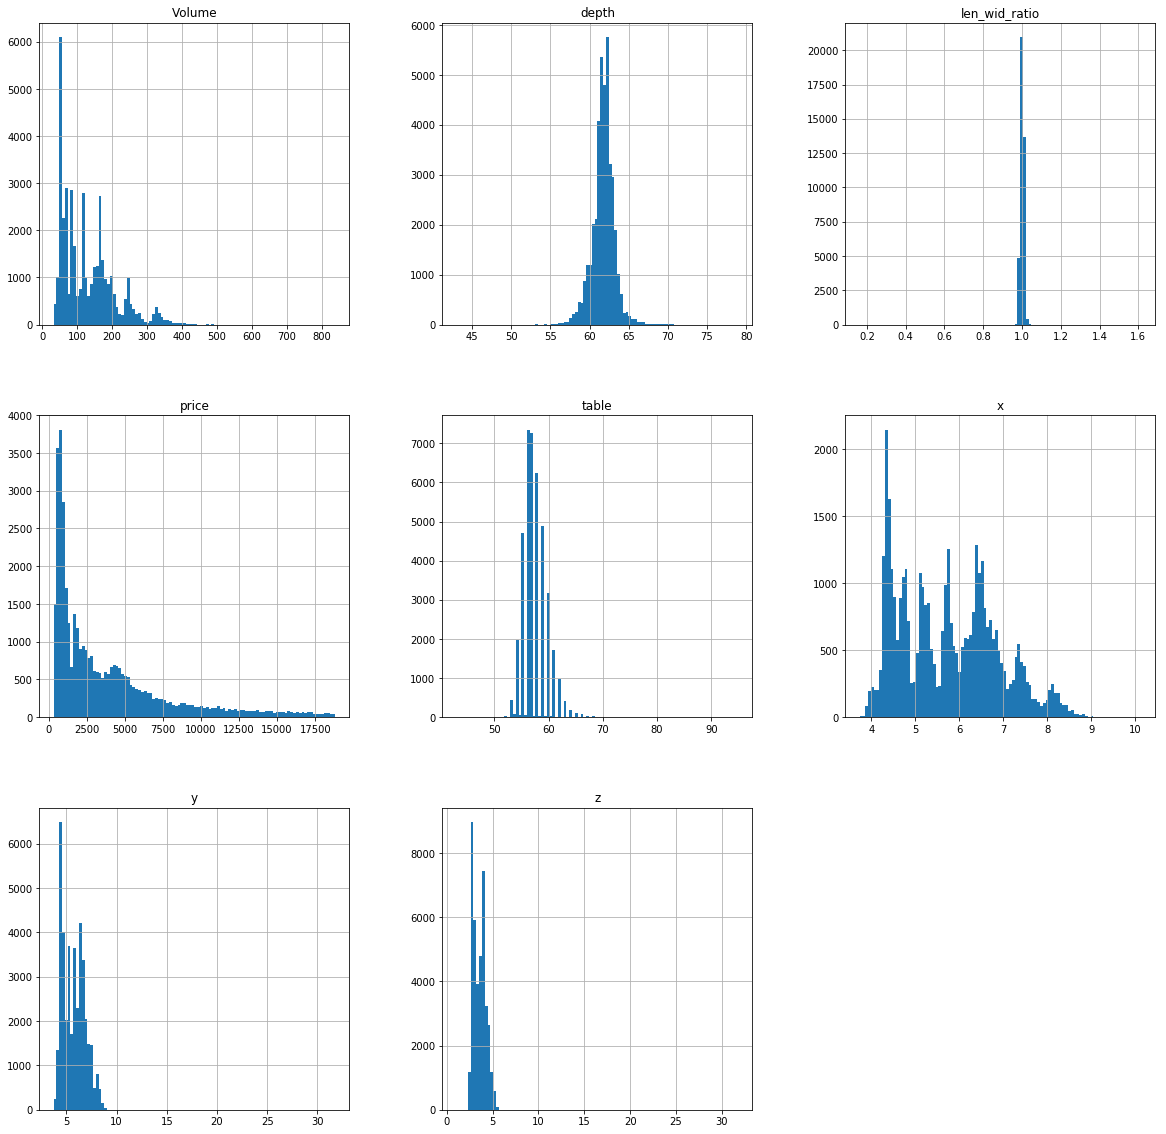

In [15]:
data.hist(bins=100,figsize=(20,20))#Plotting histograms
plt.show()

The following tabular output helps to find the Correlation/degree of association between different variables present in the dataset.
We can strongly say that the price of the diamonds is highly and positively correlated with volume, length, width, and the height of the diamonds, but negatively correlated with the variable depth of the diamond.

In [16]:
corr=data.corr()
corr

,price,depth,table,x,y,z,Volume,len_wid_ratio
price,1.000000,-0.006958,0.123513,0.887109,0.882320,0.863425,0.921772,0.090026
depth,-0.006958,1.000000,-0.297754,-0.019639,-0.022610,0.099919,0.016400,0.054625
table,0.123513,-0.297754,1.000000,0.190695,0.182556,0.145987,0.166899,0.138014
x,0.887109,-0.019639,0.190695,1.000000,0.991633,0.970441,0.977007,0.154931
y,0.882320,-0.022610,0.182556,0.991633,1.000000,0.964788,0.975410,0.063797
z,0.863425,0.099919,0.145987,0.970441,0.964788,1.000000,0.964213,0.130454
Volume,0.921772,0.016400,0.166899,0.977007,0.975410,0.964213,1.000000,0.113005
len_wid_ratio,0.090026,0.054625,0.138014,0.154931,0.063797,0.130454,0.113005,1.000000


Here in the below heatmap, we can able to visualize the correlations clearly using the coloured representation.
We can deduce the same inferences that the price of the diamonds depends heavily on volume, length, width, the height of the diamonds.
Additionally, variables x, y, z are highly correlated with each other and it is obvious that volume correlates with variables x, y, z.

Hence, it leads to multicollinearity between the predictors which results in inaccurate predictions of prices using the models built later in the project.

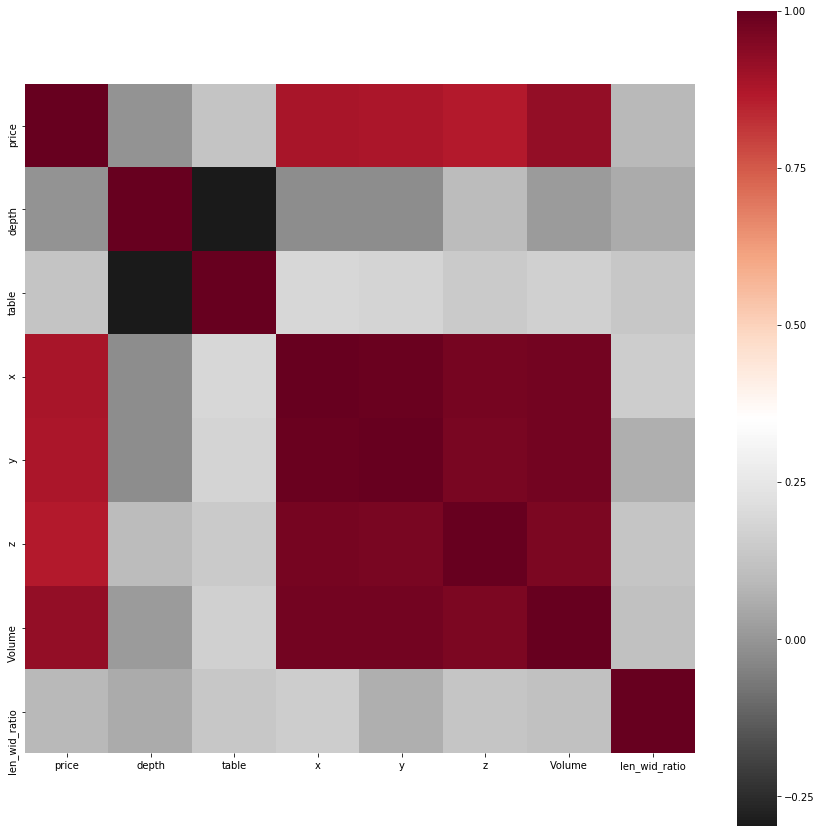

In [17]:
f,ax = plt.subplots(figsize =(15,15)) #Setting figure size
sns.heatmap(corr, vmax=1,square=True,cmap='RdGy_r') # Using seaborn package

Now, I chose to drop the variables x, y, z but not Volume as it has a high correlation with the price of a diamond.

In [18]:
data=data.drop(['x','y','z'],axis=1)

The below grid of plots are the pairwise scatter plots on all the numerical variables present in the dataset plotted using the seaborn package. We can clearly see that the price is linearly related to the volume of diamonds with a slope greater than 45 degrees.

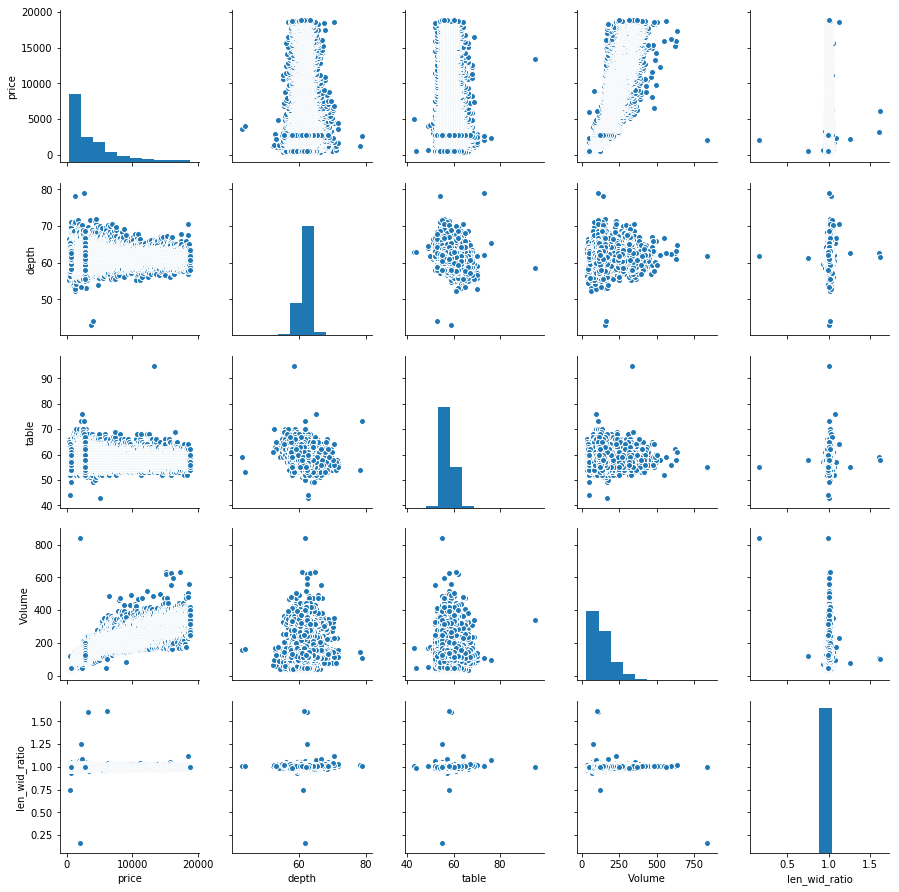

In [19]:
sns.pairplot(data)

Till now, I have plotted the visualizations of the numerical variables but in the next few plots, we can understand more about the categorical variables cut, color and clarity present in the given dataset.

The below plot is the bar chart of variable cut qualities, which states that there are five kinds of cuts possible for the diamonds, out of which diamonds with ideal cut are around 16000 and diamonds with the fair cut are around 1000 in the given dataset

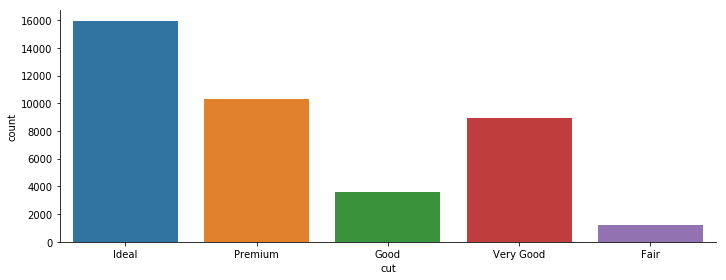

In [20]:
sns.factorplot(x='cut',data=data,kind='count',aspect=2.5) # using seaborn package

Further, from the below box plot we can see that the average price of diamonds for premium and fair cuts are higher than that of the good cut followed by the very good cut. Diamonds with ideal cut quality are cheaper than other diamonds with different cut qualities. So, one can say that there is no proper relationship between the price and cut grade of the diamonds.

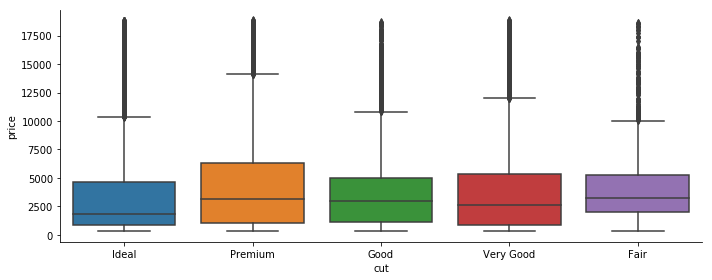

In [21]:
sns.factorplot(x='cut',y='price',data=data,kind='box',aspect=2.5) #Using seaborn package

Below plot shows the factor plot of the variable color of the diamonds dataset, which shows the counts of diamonds of various colors in the given dataset. Diamonds with color J are few while diamonds with color G are more in the given dataset.

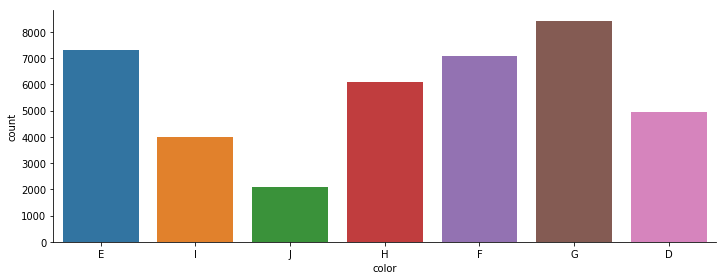

In [22]:
sns.factorplot(x='color',data=data,kind='count',aspect=2.5) #Using seaborn package

From below boxplot, we can say that diamonds with best colors have lower average price compared to diamonds of worst colors like J, I, H. Same relationship might not be true for real diamonds that are not part of this dataset. Later in the project, we can verify from models whether this inverse relationship holds good and significantly generalizes to all diamonds.

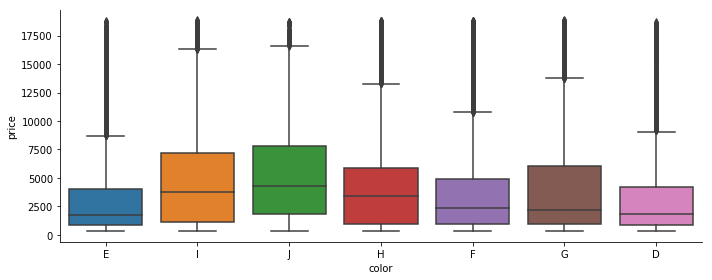

In [23]:
sns.factorplot(x='color',y='price',data=data,kind='box',aspect=2.5) #Using seaborn package

Below bar chart tells us that the mode of variable clarity is sl1.

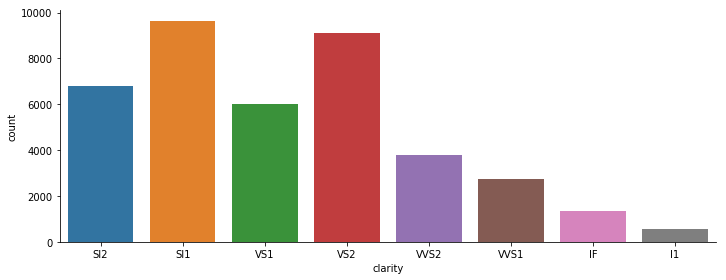

In [24]:
sns.factorplot(x='clarity',data=data,kind='count',aspect=2.5) #Using seaborn package

From below box plot, we can say that diamonds with worst clarity such as l1 have a higher average price compared to diamonds with the best clarity like IF. The same relationship might not be true for real diamonds that are not part of this dataset. Later in the project, we can verify from models whether this relationship holds good and significantly generalizes to all diamonds.

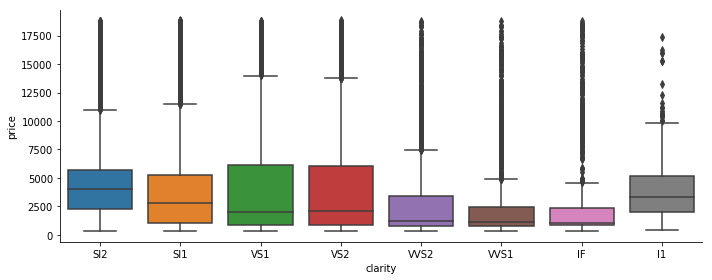

In [25]:
sns.factorplot(x='clarity',y='price',data=data,kind='box',aspect=2.5) #Using seaborn package

### Encoding for categorical variables

As python deals with only numerical variables for building models, we need to encode the categorical variables by creating dummy variables, which is known as one hot encoding or by label encoding where labels are created using numbers for each level.

Label encoding is well suited for ordinal kind of variables and when decreasing/increasing levels are in alphabetical order while dummy coding creates binary variables for each level and it increases dimensionality, this technique is best suited for nominal variables or when decreasing/increasing levels are not in alphabetical order.

Hence, I used one hot encoding in this case and after dummy encoding, all the variables in the dataset converts to numerical datatypes which is suitable for building machine learning models in python.

In [26]:
data_prepared = pd.get_dummies(data).reset_index(drop=True)

Now, I created separate data frames for the dependent and independent variables so that it is easy to pass these datasets into the models.

In [27]:
data_x = data_prepared.drop(['price'], axis=1)
data_y = data_prepared[['price']]

Then, I split the entire dataset into training and validation datasets so that I can able to check the performance of my trained model on the new dataset using various validation metrics.

In [28]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42) #Using sklearn package

In [29]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape,data_prepared.shape # Shapes of all the datasets

((31988, 24), (7997, 24), (31988, 1), (7997, 1), (39985, 25))

Now, I transformed the variable price using the natural logarithm as it has skewed distribution and then plotted the distributions with and without transformation using histograms as shown below.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D1EBC9B70>,
      dtype=object)

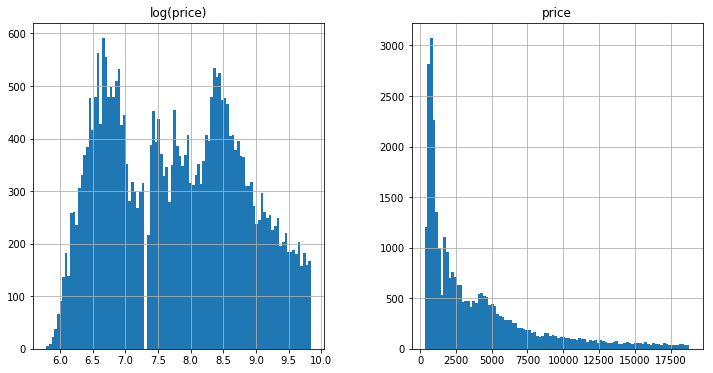

In [30]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train_y["price"], "log(price)":np.log1p(train_y["price"])})
prices.hist(bins=100)

Using below lines of code, I transformed the variable price and applied box-cox normalization to the variable volume which also has a right-skewed distribution. This kind of normalizations and transformations help the data to protect from the influence of outliers and also helps in minimizing the errors while predicting the prices on the out of time validation dataset.
The operations such as normalizations, standardization, transformations need to do after splitting the data into training and validation datasets so that model correctly generalizes to new data using the mean and standard deviation of training data.

In [31]:
train_y["price"] = np.log1p(train_y["price"]) #Applying log to the variable price

C:\Users\manid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
train_x=pd.DataFrame(train_x,columns=data_x.columns)
test_x=pd.DataFrame(test_x,columns=data_x.columns)


In [33]:
train_x['Volume'],fitted_lambda = stats.boxcox(train_x['Volume'])
test_x['Volume']= stats.boxcox(test_x['Volume'], fitted_lambda)

# train_x['Volume'] = boxcox1p(train_x['Volume'], boxcox_normmax(train_x['Volume'] + 1))
# test_x['Volume'] = boxcox1p(test_x['Volume'], boxcox_normmax(data_prepared['Volume'] + 1))

Using the code below, I standardized all the variables in the dataset by fitting to the training set and then transformed both training and validation datasets so that they all are on the same scale.

In [34]:
scale=StandardScaler()
train_x=scale.fit_transform(train_x)
test_x=scale.transform(test_x)

### Model building using Machine Learning algorithms

Firstly, I used a function to create 10 folds of samples so that I can able to use nine samples to train a model and test that model on the 10th sample and this process is repeated with all combinations of 9 + 1 sample of data. The mean of the accuracy score of these 9 different trained models is the cross-validation score that is used as a validation metric of a specific machine learning model applied to the data. This method of testing the model is called K-fold cross-validation.

Then, I have created a function which takes the type of ML model as input and outputs a dictionary with various scores as the validation metrics. This function fits the model to training data and predicts the prices on the validation data as shown below.

** Exponential function needs to be applied to the predicted prices as target variable is log(price)

In [35]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
def ml_models(model,name): # Function to fit a ML model and also to calculate errors
    dict_scores={}
    model.fit(train_x,train_y)
    pred=np.exp(model.predict(test_x))
    dict_scores['cv_rmse']=np.mean(np.sqrt(-cross_val_score(model, train_x,train_y, scoring="neg_mean_squared_error", cv=kfolds)))
    dict_scores['r2_score']=r2_score(test_y, pred) 
    dict_scores['rmse']=np.sqrt(mean_squared_error(test_y, pred))
    dict_scores['mse']=mean_squared_error(test_y, pred)
    dict_scores['mae']=mean_absolute_error(test_y, pred)
    print('The k-fold cross validation rmse on training data for '+ name + ' is %0.2f ' % dict_scores['cv_rmse'])
    print('The mean squared error for '+ name + ' is %0.2f ' % dict_scores['mse'])
    print('The mean absolute error for '+ name + ' is %0.2f ' % dict_scores['mae'])
    print('The root mean squared error for '+ name + 'is %0.2f ' % dict_scores['rmse'])
    print('The R-squared value for '+ name + ' is %0.2f' %(dict_scores['r2_score']*100)+'%')

    

### Linear Regression

In [36]:
lin_reg=LinearRegression()
ml_models(lin_reg,'Linear Regression model')

The k-fold cross validation rmse on training data for Linear Regression model is 0.14 
The mean squared error for Linear Regression model is 630979.53 
The mean absolute error for Linear Regression model is 416.62 
The root mean squared error for Linear Regression modelis 794.34 
The R-squared value for Linear Regression model is 95.93%


### Gradient Boosting

Here I have used 100 decision trees as I believe still a higher number would make the model overfit and is not appropriate on the real world new data; learning rate as 0.1, I feel this number is optimum as a higher number would give inaccurate results while a lower number makes the model to run slowly.

In [37]:
grad_boost=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=4,max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42) 
ml_models(grad_boost,'Gradient Boosting')

C:\Users\manid\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manid\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manid\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\manid\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

The k-fold cross validation rmse on training data for Gradient Boosting is 0.17 
The mean squared error for Gradient Boosting is 1408012.68 
The mean absolute error for Gradient Boosting is 560.74 
The root mean squared error for Gradient Boostingis 1186.60 
The R-squared value for Gradient Boosting is 90.92%


### Random Forest

Here I have used a random_state parameter to give the same results if it is run multiple times and the rest are the default values of parameters of RandomForestRegressor function.

In [38]:
rf_reg=RandomForestRegressor(random_state=42)
ml_models(rf_reg,'Random Forest')

C:\Users\manid\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\manid\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\manid\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\manid\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), f

The k-fold cross validation rmse on training data for Random Forest is 0.10 
The mean squared error for Random Forest is 332324.29 
The mean absolute error for Random Forest is 287.83 
The root mean squared error for Random Forestis 576.48 
The R-squared value for Random Forest is 97.86%


### Feature Importance

As RandomForest model has good validation metrics with lower error scores and higher R-squared value of 97%, it is used to determine the Gini feature importance of all the variables used in the final model using the code below.

In [39]:
feature_imp={}
for feature, importance in zip(data_x.columns, rf_reg.feature_importances_):
    feature_imp[feature]=importance

In [40]:
feature_importances= pd.DataFrame.from_dict(feature_imp, orient='index').rename(columns={0: 'Gini-importance'})

In [41]:
feature_importances.sort_values(by='Gini-importance',ascending=False)

,Gini-importance
Volume,0.944056
clarity_SI2,0.009524
clarity_SI1,0.007090
clarity_I1,0.006414
len_wid_ratio,0.005102
color_J,0.004758
color_I,0.003682
clarity_VS2,0.002570
color_H,0.002375
depth,0.001926


From the above table, Volume turned out as the most important variable with Gini importance of 0.94 followed by clarity, len_wid_ratio.
Also, the features I have created turned out as important as well.

### OLS regression using statsmodels package

The machine learning models that I have built earlier using the sklearn package, are aimed to get a good model that reduces overfitting, with maximum accuracy on new data. Now, I chose OLS regression on diamonds dataset to interpret the regression results clearly and to know what are the significant variables for predicting the price of the diamonds.


Below output shows that the variable table is insignificant in predicting the price. Further, it can be interpreted that diamonds with clarity IF has a higher price compared to diamonds with other levels of clarity(here clarity L1 has been taken as a base variable by OLS function). Similarly, we can conclude that diamonds with color grade D has a higher price than that of other colored diamonds. It is obvious that colorless diamonds and that of lower color grades are not attractive, and they are not used as jewellery, hence they are cheaper in value.

The variables volume, len_wid_ratio has positive coefficients which means that as these values increases, the price of diamonds also increases.

In [42]:
equation = "price ~ depth + table + Volume + cut+color+clarity+len_wid_ratio"
model = smf.ols(formula=equation, data=data)
model_results = model.fit()
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 1.974e+04
Date:                Sun, 09 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:09:59   Log-Likelihood:            -3.3956e+05
No. Observations:               39985   AIC:                         6.792e+05
Df Residuals:                   39963   BIC:                         6.794e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.672e+04    719.755  

### Insights from the Diamonds dataset

1. The volume of a diamond is the most significant feature while predicting its price. Higher the volume of diamond, the more expensive it is. Length, breadth, height are ignored in this analysis as they are highly correlated with each other.
2. The next important feature that helps in price prediction of diamonds is clarity followed by length to width ratio. The relationship between the price and clarity is not corroborated by the box plots provided earlier in the analysis.
3. From OLS regression coefficients, we can say that clarity is a significant variable and it is positively correlated with the price of diamonds. In other words, High clarity diamonds like Internationally Flawless(IF) diamonds are expensive in nature while diamonds that have worst clarity are cheaper.
4. Length to width ratio is kind of partial substitution to carat weight and it is positively correlated with the carat weight of the diamond. The coefficient of len_wid_ratio is positive in OLS output. Hence, we can say that higher the carat, higher is the price of the diamond and vice-versa.
5. Color of the diamonds is also said to be an important parameter for price prediction. Colored diamonds like of grade D are very rare and people usually like them, hence they are very expensive. Colorless diamonds are cheaper and also not preferred by many people as jewellery. 
6. Finally, I conclude that the random forest is a better model to predict the prices of the diamonds precisely compared to other models used in this analysis as it has predicted prices of validation data with low error rate and high accuracy.